<a href="https://colab.research.google.com/github/kariukimary/Cattle-diseaase-detection/blob/main/cattle_foot_and_mouth_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#importing the libraries or dependencies
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np





In [ ]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=10

In [ ]:
#loading the datset
image_dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Cattle_data",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,


)

Found 303 files belonging to 2 classes.


# Data analysis and exploration

In [ ]:
#getting the class names
class_names=image_dataset.class_names
class_names

['0', '1']

In [ ]:
#length of the dataset
len(image_dataset)

10

In [ ]:
#exploring the dataset
for image_batch, label_batch in image_dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())


(32, 256, 256, 3)
[1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0]


In [ ]:
#displaying the first image
for image_batch,label_batch in image_dataset.take(1):
  print(image_batch[0])

tf.Tensor(
[[[229.75 218.75 198.75]
  [239.25 226.25 207.25]
  [243.   231.   211.5 ]
  ...
  [255.   255.   255.  ]
  [255.   255.   255.  ]
  [255.   255.   255.  ]]

 [[229.75 217.75 200.25]
  [238.25 225.25 208.25]
  [241.75 230.75 211.25]
  ...
  [255.   255.   255.  ]
  [255.   255.   255.  ]
  [255.   255.   255.  ]]

 [[230.   215.5  199.  ]
  [237.5  223.   207.  ]
  [242.5  229.5  212.5 ]
  ...
  [255.   255.   255.  ]
  [255.   255.   255.  ]
  [255.   255.   255.  ]]

 ...

 [[142.5  160.5  182.5 ]
  [142.75 163.75 184.75]
  [140.25 161.5  183.75]
  ...
  [166.75 201.75 229.75]
  [166.25 200.75 228.75]
  [181.25 215.25 241.25]]

 [[141.   159.   183.  ]
  [138.5  158.5  182.5 ]
  [142.5  162.5  186.5 ]
  ...
  [163.5  199.   226.  ]
  [178.5  212.5  240.  ]
  [172.   206.   232.5 ]]

 [[140.75 158.75 182.25]
  [135.   155.   179.25]
  [134.   154.5  178.75]
  ...
  [163.25 197.25 228.25]
  [167.25 201.25 228.75]
  [166.75 200.5  228.75]]], shape=(256, 256, 3), dtype=float32

In [ ]:
#converting from tensor to numpy
for image_batch,label_batch in image_dataset.take(1):
  print(image_batch[0].numpy())

[[[ 31.75  44.    65.75]
  [ 28.    43.    64.  ]
  [ 23.75  40.    63.75]
  ...
  [ 43.25  51.25  63.75]
  [ 43.5   49.75  63.25]
  [ 43.5   50.25  61.5 ]]

 [[ 32.    43.    66.5 ]
  [ 26.    40.25  61.5 ]
  [ 26.5   40.    63.5 ]
  ...
  [ 43.75  52.    65.5 ]
  [ 42.25  49.25  63.5 ]
  [ 42.25  49.75  61.  ]]

 [[ 30.5   42.5   66.5 ]
  [ 28.25  41.75  63.25]
  [ 27.    40.5   62.5 ]
  ...
  [ 43.75  51.5   64.75]
  [ 42.    49.5   64.  ]
  [ 41.75  49.75  61.25]]

 ...

 [[254.   254.   254.  ]
  [254.   254.   254.  ]
  [254.5  254.5  254.5 ]
  ...
  [ 31.75  39.75  56.25]
  [ 30.25  41.25  58.  ]
  [ 35.25  43.25  62.25]]

 [[254.5  254.5  254.5 ]
  [254.   254.   254.  ]
  [254.   254.   254.  ]
  ...
  [ 32.    39.5   57.25]
  [ 28.5   39.5   57.5 ]
  [ 32.75  41.25  59.25]]

 [[253.5  253.5  253.5 ]
  [253.25 253.25 253.25]
  [253.   253.   253.  ]
  ...
  [ 30.5   37.5   54.5 ]
  [ 26.25  39.25  56.25]
  [ 30.75  40.75  58.25]]]


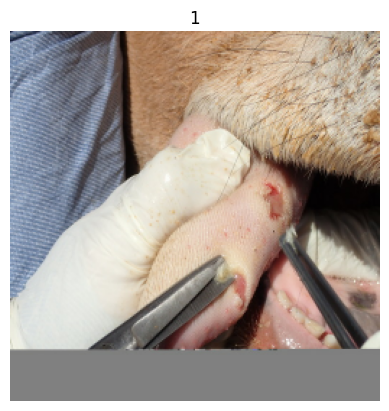

In [ ]:
#visualizing the first image in the batch
for image_batch,label_batch in image_dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  plt.title(class_names[label_batch[0]])
  plt.axis("off")

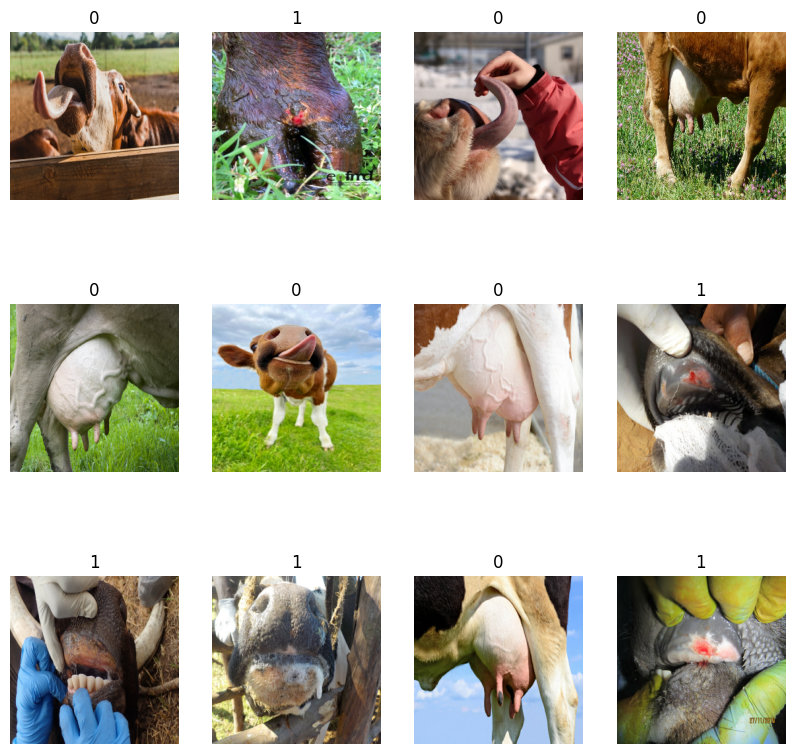

In [ ]:
#displaying multiple images
plt.figure(figsize=(10,10))
for image_batch,label_batch in image_dataset.take(1):
  for i in range(12):
    ax=plt.subplot(3,4, i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")


In [ ]:
#splsitting our dataset into training, validation and test dataset
def split_dataset(dataset,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=1000):
  ds_size=len(dataset)
  if shuffle:
    dataset=dataset.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=dataset.take(train_size)
    val_ds=dataset.skip(train_size).take(val_size)
    test_ds=dataset.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

train_ds,val_ds,test_ds=split_dataset(image_dataset)


In [ ]:
#getting the length of each split
len(train_ds),len(val_ds),len(test_ds)

(8, 1, 1)

# Data preprocessing

In [ ]:
#prefetching the data
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
#rescaling and resizing
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)

])

In [ ]:
#data augmentation
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),



])

# model building and training

In [ ]:
#building the model
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=1
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(n_classes, activation="sigmoid"),

])
model.build(input_shape=input_shape)

In [ ]:
#getting the summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
#compling the model
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)


In [ ]:
#training the model
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds)

Epoch 1/10
8/8 [==============================] - 54s 6s/step - loss: 2.0719 - accuracy: 0.5039 - val_loss: 0.7373 - val_accuracy: 0.4688
Epoch 2/10
8/8 [==============================] - 43s 5s/step - loss: 0.6366 - accuracy: 0.6133 - val_loss: 0.5592 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 44s 5s/step - loss: 0.5416 - accuracy: 0.7188 - val_loss: 0.5492 - val_accuracy: 0.6875
Epoch 4/10
8/8 [==============================] - 44s 5s/step - loss: 0.5342 - accuracy: 0.7188 - val_loss: 0.6492 - val_accuracy: 0.5312
Epoch 5/10
8/8 [==============================] - 52s 7s/step - loss: 0.5576 - accuracy: 0.6758 - val_loss: 0.5313 - val_accuracy: 0.6875
Epoch 6/10
8/8 [==============================] - 44s 5s/step - loss: 0.5200 - accuracy: 0.7422 - val_loss: 0.5740 - val_accuracy: 0.6250
Epoch 7/10
8/8 [==============================] - 47s 6s/step - loss: 0.5425 - accuracy: 0.7266 - val_loss: 0.5535 - val_accuracy: 0.8125
Epoch 8/10
8/8 [==================

In [ ]:
scores=model.evaluate(test_ds)

1/1 [==============================] - 5s 5s/step - loss: 0.4438 - accuracy: 0.8438


In [ ]:
scores

[0.4437764585018158, 0.84375]

In [ ]:
#printing the keys of the  model
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


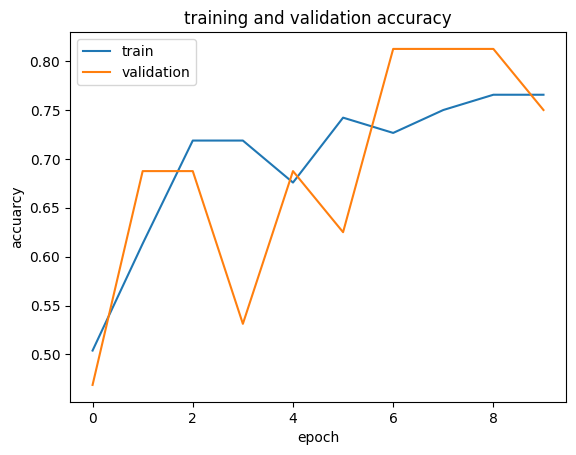

In [ ]:
#visualizing the training and the validation accuracy
def plot_hist(hist):
  plt.plot(hist.history["accuracy"])
  plt.plot(hist.history["val_accuracy"])
  plt.title("training and validation accuracy")
  plt.ylabel("accuarcy")
  plt.xlabel("epoch")
  plt.legend(["train","validation"], loc='upper left')
  plt.show()
plot_hist(history)





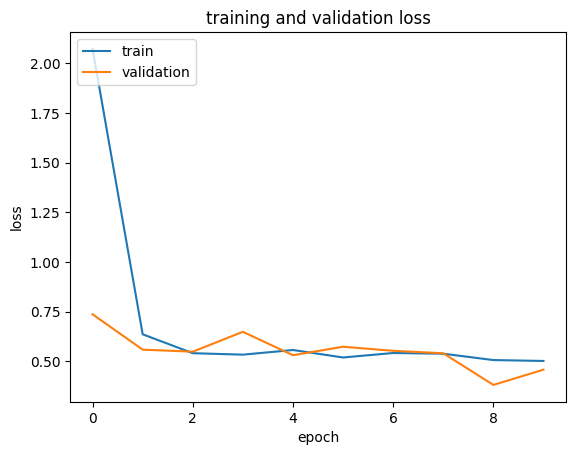

In [ ]:
#visualizing the training and the validation accuracy
def plot_hist(hist):
  plt.plot(hist.history["loss"])
  plt.plot(hist.history["val_loss"])
  plt.title("training and validation loss")
  plt.ylabel("loss")
  plt.xlabel("epoch")
  plt.legend(["train","validation"], loc='upper left')
  plt.show()
plot_hist(history)

In [ ]:
#making predictions
for image_batch,label_batch in test_ds.take(4):
  image1=image_batch[2].numpy().astype("uint8")
  label1=label_batch[2].numpy()
  print("predicting the first image")
  plt.imshow(image1)
  print("image1 True label",class_names[label1])
  batch_prediction=model.predict(image_batch)
  print("image1 predicted label",class_names[np.argmax(batch_prediction[2])])

